## Importing necessary modules

In [2]:
# Import List
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [20]:
# load the dataset into a dataframe (df)
df = pd.read_csv("owid-energy-data.csv")
# as the dataset is huge (122 columns) I have chosen some of the most relevant columns to focus in on
historical_nrg = df[['country','year','coal_production','electricity_generation','biofuel_electricity',
                    'coal_electricity','fossil_electricity','gas_electricity','hydro_electricity',
                    'nuclear_electricity','oil_electricity','renewables_electricity','oil_production',
                     'solar_electricity','wind_electricity', 'gas_production', 'renewables_consumption', 
                     'other_renewable_consumption', 'hydro_consumption', 'wind_consumption', 'solar_consumption', 
                     'electricity_demand']]
# Filter from 1980 and beyond
nrg_since_1980 = historical_nrg[historical_nrg['year']>=1980]

In [21]:
# a .describe() to show some stats about the data
nrg_since_1980.describe()

,year,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,...,oil_production,solar_electricity,wind_electricity,gas_production,renewables_consumption,other_renewable_consumption,hydro_consumption,wind_consumption,solar_consumption,electricity_demand
count,9326.000000,8137.000000,6007.000000,4752.000000,5409.000000,5409.000000,5409.000000,6397.000000,6397.000000,5409.000000,...,4896.000000,6397.000000,6397.000000,4864.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,4752.000000
mean,2000.165023,615.275679,399.842327,3.502562,169.611185,285.547636,86.077949,66.410701,56.723225,29.858509,...,1295.739459,2.425925,7.077150,778.251702,389.040009,28.998183,305.830392,30.936314,10.539379,200.855402
std,11.645980,3457.139127,1850.463022,26.244959,807.994726,1280.160627,391.929792,301.711184,264.971325,125.308032,...,5026.349221,25.246683,57.503173,3104.587801,1384.275031,117.462836,1034.620375,189.235427,83.025818,1452.505391
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,0.000000,1.509000,0.000000,0.000000,0.354000,0.000000,0.007000,0.000000,0.055000,...,0.000000,0.000000,0.000000,0.000000,4.832750,0.000000,2.394750,0.000000,0.000000,0.908500
50%,2000.000000,0.000000,14.820000,0.001000,0.000000,4.670000,0.767000,1.833000,0.000000,0.951000,...,28.668500,0.000000,0.000000,14.784000,30.478000,0.581000,22.150000,0.003000,0.000000,7.799000
75%,2010.000000,6.380000,73.767000,0.283000,16.010000,50.620000,19.340000,13.706000,0.000000,7.192000,...,405.442250,0.008000,0.038000,202.813000,124.597500,7.922000,99.239000,1.125250,0.071000,51.916250
max,2021.000000,46627.422000,25899.806000,586.179000,9345.341000,16233.117000,5943.112000,4355.042000,2720.674000,1364.459000,...,52151.154000,844.386000,1590.189000,39762.119000,19409.516000,1727.155000,10600.736000,3925.718000,2111.177000,25882.383000


In [6]:
print("Shape of national energy dataset: ", nrg_since_1980.shape)
# Taking a peak at the dataset, seemingly a lot of null values
nrg_since_1980.head()

Shape of national energy dataset:  (9326, 22)


,country,year,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,...,oil_production,solar_electricity,wind_electricity,gas_production,renewables_consumption,other_renewable_consumption,hydro_consumption,wind_consumption,solar_consumption,electricity_demand
80,Afghanistan,1980,0.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,Afghanistan,1981,0.726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Afghanistan,1982,0.842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Afghanistan,1983,0.842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Afghanistan,1984,0.859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
national_nulls = nrg_since_1980.isna().sum()
print("National null counts: \n", national_nulls, "\n")

National null counts: 
 country                           0
year                              0
coal_production                1189
electricity_generation         3319
biofuel_electricity            4574
coal_electricity               3917
fossil_electricity             3917
gas_electricity                3917
hydro_electricity              2929
nuclear_electricity            2929
oil_electricity                3917
renewables_electricity         2929
oil_production                 4430
solar_electricity              2929
wind_electricity               2929
gas_production                 4462
renewables_consumption         5670
other_renewable_consumption    5670
hydro_consumption              5670
wind_consumption               5670
solar_consumption              5670
electricity_demand             4574
dtype: int64 



Due to the high missing value rate, I will forward and backward fill the values. This is a better option than replacing the values with a 0, however, given more time I would have run a more advanced imputation algorithm

In [8]:
nrg_since_1980 = nrg_since_1980.fillna(method='ffill').fillna(method='bfill')
nrg_since_1980.isna().sum()

country                        0
year                           0
coal_production                0
electricity_generation         0
biofuel_electricity            0
coal_electricity               0
fossil_electricity             0
gas_electricity                0
hydro_electricity              0
nuclear_electricity            0
oil_electricity                0
renewables_electricity         0
oil_production                 0
solar_electricity              0
wind_electricity               0
gas_production                 0
renewables_consumption         0
other_renewable_consumption    0
hydro_consumption              0
wind_consumption               0
solar_consumption              0
electricity_demand             0
dtype: int64

In [9]:
# Another filter, to look at just the UK
UK = ['United Kingdom']
UK_nrg_since_1980 = nrg_since_1980.loc[nrg_since_1980['country'].isin(UK)]

In [10]:
# Setting a colour scheme
palette="Dark2"
sns.set_palette(palette)

## Electricity source distribution in the UK

/var/folders/f1/4r_g6lt535qg4nfz33fjyc780000gn/T/ipykernel_4414/2719655151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrg_since_1980['total'] = nrg_since_1980[nrg_sources].sum(axis=1)
/var/folders/f1/4r_g6lt535qg4nfz33fjyc780000gn/T/ipykernel_4414/2719655151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_df[f"{i}%"] = round(100*(nrg_since_1980[i]/nrg_since_1980['total']), 4)


ValueError: cannot convert float NaN to integer

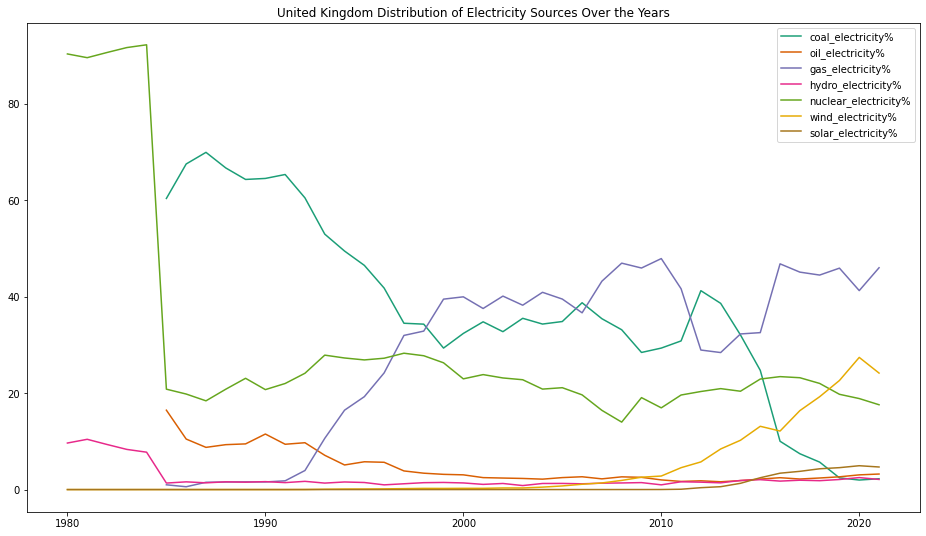

posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1728x864 with 3 Axes>

In [92]:
nrg_sources = ['coal_electricity', 'oil_electricity', 'gas_electricity', 'hydro_electricity', 
               'nuclear_electricity', 'wind_electricity', 'solar_electricity'] 
# Create a total column that totals the amount of electricity produced in each category 
nrg_since_1980['total'] = nrg_since_1980[nrg_sources].sum(axis=1)
electricity_df = nrg_since_1980[['year', 'country']]
# get a percentage for all the electricity generation used
for i in nrg_sources:
    electricity_df[f"{i}%"] = round(100*(nrg_since_1980[i]/nrg_since_1980['total']), 4)
    
# plot the change in the percentage over the years 
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
graph_df = electricity_df[electricity_df['country']=='United Kingdom'].groupby('year').mean()
ax.plot(graph_df, label=graph_df.columns)
ax.set_title("United Kingdom Distribution of Electricity Sources Over the Years")
ax.legend();

# 3 pie charts comparing the percentage of renewables from 1980, 2000 and 2020 
years = [1980, 2000, 2020]
count = 0 
fig2, ay = plt.subplots(1, 3, figsize= (24,12))

for y in years:
    pie_chart = graph_df[(graph_df.index.values==y)]
    for i in pie_chart.columns:
        if pie_chart.iloc[0][i]<1: # if there are any values in the pie chart with a value of 0, drop them
            pie_chart.drop(columns=[i], axis=1, inplace=True)
    ay[count].pie(pie_chart.iloc[0].values, labels=pie_chart.columns)
    ay[count].set_title(f"{int(y)} Electricity Distribution")
    count += 1
    
#plt.show()

From looking at the first chart, we can see that coal and gas dominate the UK's source of electricity generation. Up until the 2010s where we see a slight increase in the use of renewables. 
The UK has only slightly moved away from nuclear energy, showing a slight decrease overall between 1980 and now. Oil, hydro and solar all represent a minute proportion of our electricity generation. Perhaps there is room for growth here, namely in hydro electrics, they could have a larger presence in coastal towns and cities (like bournemouth). Hydro-electrics would benefit from more investment since they are depedent on the tides, which we can predict a lot more accurately as opposed to the amount of sunlight, which is highly variate, especially in the UK. 
In the current day, the UK's most promising renewable is clearly wind, as shown by its recent spike from around ~2015-2020.

ValueError: cannot convert float NaN to integer

posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1728x864 with 3 Axes>

## Renewable Energy Consumption

In [78]:
# All renewable energy consumption
nrg_consumption = ['country', 'year', 'renewables_consumption', 'other_renewable_consumption', 'hydro_consumption',
                  'solar_consumption', 'wind_consumption']
renewable_consumption = ['hydro_consumption', 'solar_consumption', 'wind_consumption', 'other_renewable_consumption']
# Using the filtered dataset that contains nulls, since the processed dataset has a lot of missing rows that skew
# the visualisation
nrg_df = historical_nrg[nrg_consumption]
year_range = nrg_df['year'].isin(range(1980, 2021))
nrg_df = nrg_df[year_range]
renewable_bar = nrg_df.groupby('year')[renewable_consumption].sum()
renewable_bar.reset_index(level=0, inplace=True)

renewable_bar.head(10)

,year,hydro_consumption,solar_consumption,wind_consumption,other_renewable_consumption
0,1980,17805.275,0.000,0.145,479.465
1,1981,18187.896,0.000,0.145,514.128
2,1982,18381.936,0.000,0.255,602.025
3,1983,19122.941,0.024,0.440,665.115
4,1984,19722.949,0.057,0.584,738.481
5,1985,20067.544,0.102,0.853,759.922
6,1986,20190.939,0.129,1.901,839.335
7,1987,20593.901,0.087,2.691,889.438
8,1988,21390.614,0.088,4.594,920.509
9,1989,20988.733,2.235,24.920,1009.572


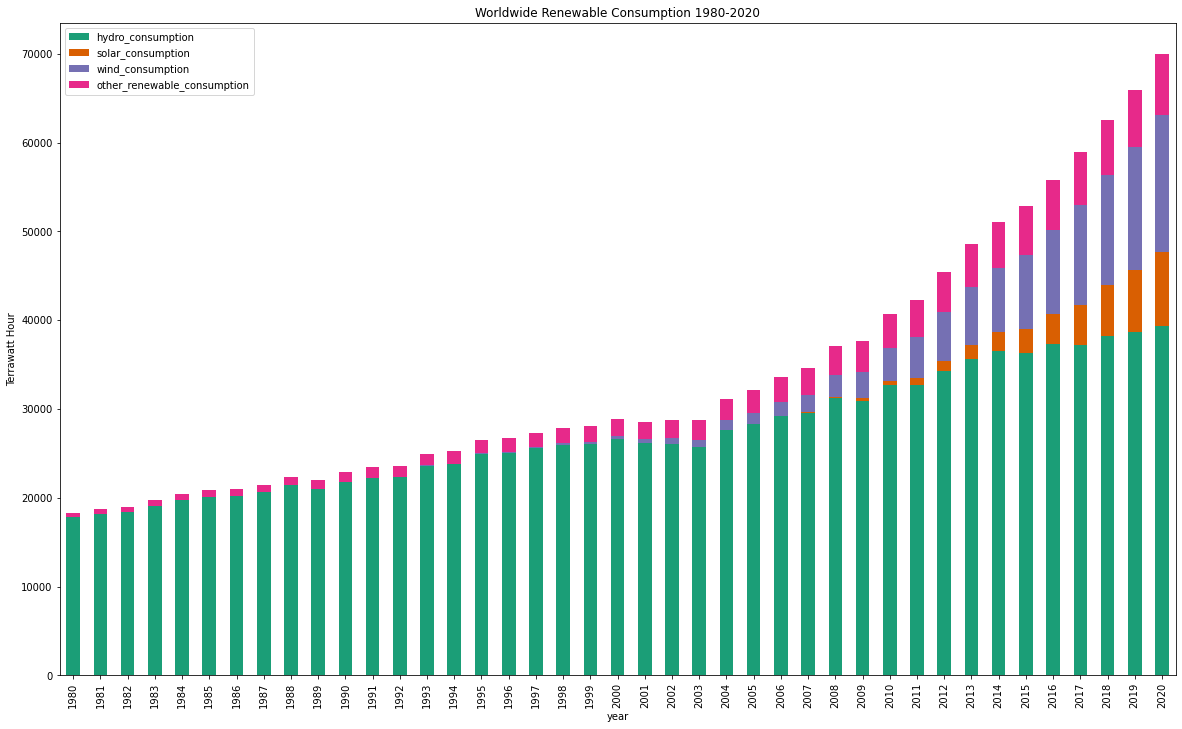

In [79]:
renewable_bar.plot(x='year', ylabel='Terrawatt Hour', kind='bar', stacked=True, figsize=(20, 12), 
         title='Worldwide Renewable Consumption 1980-2020');

The visualisation above shows a clear exponential increase in the use of renewable energy, mainly hydro electrics, but also seeing a significant growth in wind, solar and other renewables. 
It's hard to say whether this trend will continue at the rate it has, as it relies on science and further research to improve the efficiency of more renewables. More uncertainty arises as driving down cost to enable wide-scale adoption is a future that is not as concrete. 

## Electricity Demand in the UK Over the Years

In [80]:
UK = ['United Kingdom']
uk_nrg = historical_nrg.loc[historical_nrg['country'].isin(UK)]
uk_nrg_1990 = uk_nrg[uk_nrg['year']>=1990]
uk_elec_df = uk_nrg_1990[['year', 'electricity_demand']]
uk_elec_df.reset_index(inplace = True, drop = True)
elec_bar = uk_elec_df
elec_bar.tail(10)

,year,electricity_demand
22,2012,372.75
23,2013,369.81
24,2014,355.73
25,2015,356.45
26,2016,354.03
27,2017,349.86
28,2018,349.61
29,2019,342.82
30,2020,325.02
31,2021,329.62


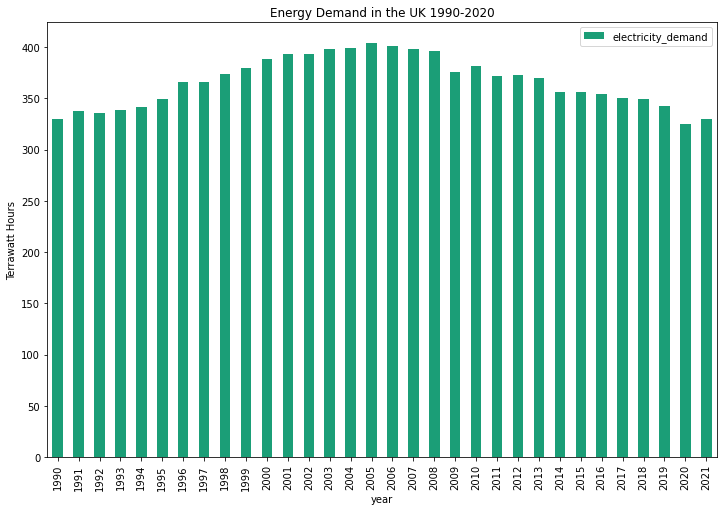

In [82]:
elec_bar.plot(x='year', ylabel='Terrawatt Hours', kind='bar', figsize=(12, 8), 
         title='Energy Demand in the UK 1990-2020');

We don't have as much historical data to go off of here, so the time-series forecasting of this is going to be difficult, and may not be as accurate as it could be. 

## Univariate Time-Series Forecasting of Electricity Demand in the UK